In [1]:
import omega_prime
import numpy as np

In [2]:
r = omega_prime.Recording.from_file("example_files/pedestrian.osi", xodr_path="example_files/fabriksgatan.xodr")

In [3]:
locator = omega_prime.Locator.from_map(r.map)

In [4]:
mv = r.moving_objects[1]
mv

In [5]:
sts = locator.locate_mv(mv)
sts

<xarray.Dataset> Size: 14kB
Dimensions:      (time: 434)
Coordinates:
  * time         (time) uint64 3kB 0 33000000 ... 14255999999 14288999999
Data variables:
    s            (time) float64 3kB 14.86 14.86 14.86 ... 4.993 4.943 4.894
    t            (time) float64 3kB -0.5 -0.5 -0.5 -0.5 ... 0.4999 0.4999 0.4999
    roadlane_id  (time) object 3kB XodrLaneId(road_id='0', lane_id=3, section...

In [6]:
sts_poly = locator.locate_mv(mv, use_polygon=True)
sts_poly

<xarray.Dataset> Size: 14kB
Dimensions:      (time: 434)
Coordinates:
  * time         (time) uint64 3kB 0 33000000 ... 14255999999 14288999999
Data variables:
    s            (time) float64 3kB 14.86 14.86 14.86 ... 4.993 4.943 4.894
    t            (time) float64 3kB -0.5 -0.5 -0.5 -0.5 ... 0.4999 0.4999 0.4999
    roadlane_id  (time) object 3kB XodrLaneId(road_id='0', lane_id=3, section...

In [7]:
derived_xys = locator.sts2xys(sts)
derived_xys_poly = locator.sts2xys(sts_poly)
derived_xys_poly.shape

(434, 2)

In [8]:
np.max(np.linalg.norm(derived_xys_poly - mv.df["x", "y"].to_numpy(), axis=1))

np.float64(2.0727719536908503e-05)

(-75.0, 0.0)

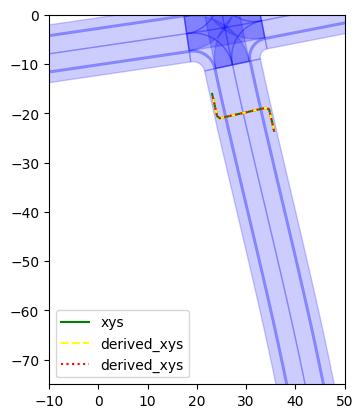

In [9]:
# %matplotlib ipympl
# pip install ipympl
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.patches import Polygon as PltPolygon

_, ax = plt.subplots(1, 1)

for lid, l in r.map.lanes.items():
    ax.add_patch(PltPolygon(l.polygon.exterior.coords, fc="blue", alpha=0.2, ec="blue"))
ax.plot(*mv.df["x", "y"].to_numpy().T, label="xys", c="green")
ax.plot(*derived_xys_poly.T, label="derived_xys", c="yellow", linestyle="dashed")
ax.plot(*derived_xys.T, label="derived_xys", c="red", linestyle="dotted")
ax.autoscale()
ax.set_aspect(1)
ax.legend()
ax.set_xlim(-10, 50)
ax.set_ylim(-75, 0)

In [11]:
sts11 = locator.xys2lane_sts(lane_id=omega_prime.map_odr.XodrLaneId("0", 1, 0), xys=mv.df["x", "y"].to_numpy())
sts11.shape

(434, 2)